# Loan Approval Prediction

- Objective :
- The objective of a loan approval prediction model is to automate and optimize the process of evaluating loan applications.
- Imagine a company called Dream Housing Finance that provides home loans across urban, semi-urban, and rural areas.
- Customers apply for home loans, and the company validates their eligibility based on various factors such as gender, marital status, education, income, loan amount, credit history, and more.
- The company aims to automate the loan eligibility process in real-time using customer details provided during the online application.
- Specifically, they want to identify customer segments eligible for loan amounts so that they can target these customers effectively.
- The loan approval prediction task is a classification problem.
- We need to predict whether a loan application will be approved or not.

- Dataset Details:

- Numerical Features:
- Applicant Income: Income of the primary applicant.
- Coapplicant Income: Income of the co-applicant (if any).
- Loan Amount: The requested loan amount.
- Loan Amount Term: The term (duration) of the loan.
- Dependents: Number of dependents.

- Categorical Features:
- Gender: Gender of the applicant.
- Credit History: Credit history (binary: 1 for good, 0 for bad).
- Self-Employed: Whether the applicant is self-employed.
- Married: Marital status.
- Loan Status: The target variable indicating loan approval (Y for approved, N for not approved).

- Alphanumeric Feature:
- Loan ID: A unique identifier for each loan application.

- Text Feature:
- Education: Education level of the applicant.
- Property Area: Type of property area (urban, rural, semi-urban).

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [2]:
#reading the dataset
df = pd.read_csv("Loan Prediction Dataset.csv")

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

In [5]:
#Return all numeric column
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
#Return all the information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# preprocessing the dataset

In [7]:
# find the null values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
# fill the missing values for numerical terms - median
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].median())

In [9]:
# fill the missing values for categorical terms - mode
df['Gender'] = df["Gender"].fillna(df['Gender'].mode()[0]) #return single value
df['Married'] = df["Married"].fillna(df['Married'].mode()[0])
df['Dependents'] = df["Dependents"].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df["Self_Employed"].fillna(df['Self_Employed'].mode()[0])

In [10]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Exploratory Data Analysis

Gender
Male      502
Female    112
Name: count, dtype: int64


<Axes: xlabel='Gender', ylabel='count'>

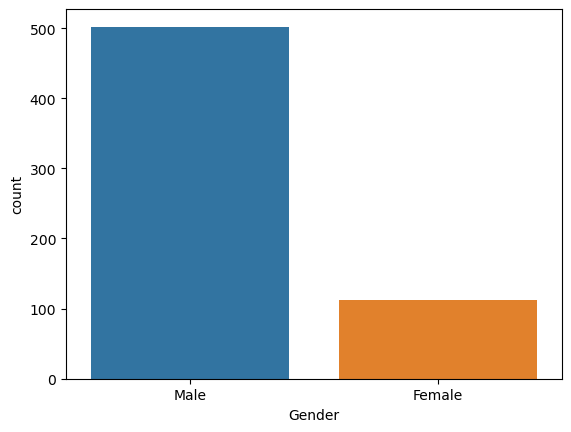

In [11]:
#No of people who take loan as group by gender
print(df['Gender'].value_counts())
sns.countplot(x='Gender',data=df)

Married
Yes    401
No     213
Name: count, dtype: int64


<Axes: xlabel='Married', ylabel='count'>

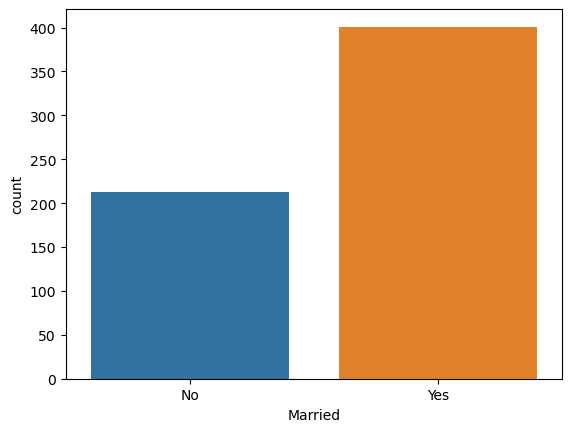

In [12]:
#No of people who take loan as group by marital status
print(df['Married'].value_counts())
sns.countplot(x='Married',data=df)

Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64


<Axes: xlabel='Dependents', ylabel='count'>

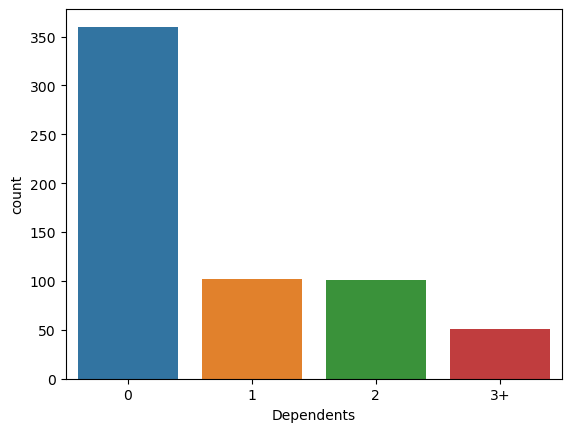

In [13]:
#No of people who take loan as group by dependents
print(df['Dependents'].value_counts())
sns.countplot(x='Dependents',data=df)

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64


<Axes: xlabel='Education', ylabel='count'>

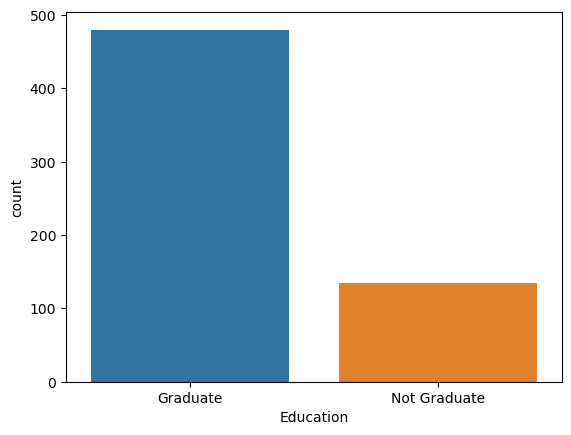

In [14]:
#No of people who take loan as group by Education
print(df['Education'].value_counts())
sns.countplot(x='Education',data=df)

Self_Employed
No     532
Yes     82
Name: count, dtype: int64


<Axes: xlabel='Self_Employed', ylabel='count'>

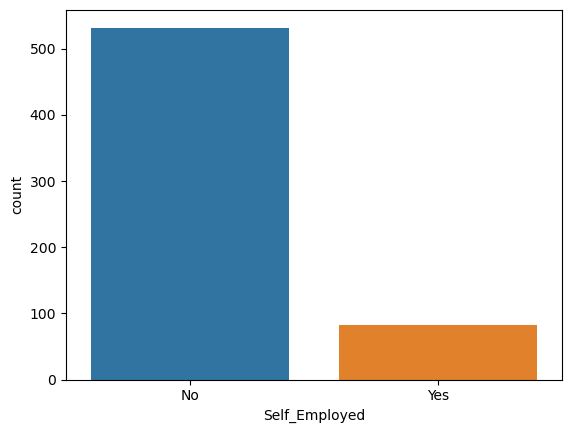

In [15]:
#No of people who take loan as group by Self_Employed
print(df['Self_Employed'].value_counts())
sns.countplot(x='Self_Employed',data=df)

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64


<Axes: xlabel='Property_Area', ylabel='count'>

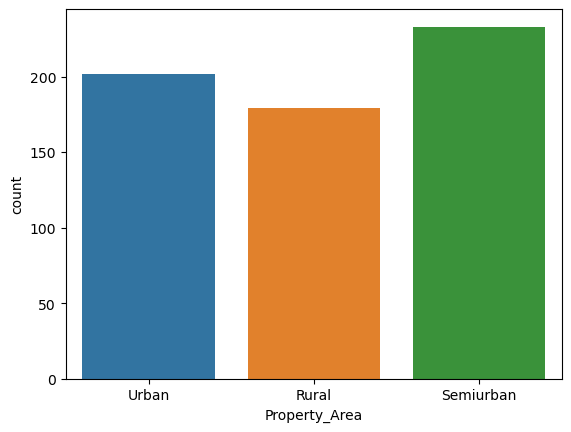

In [16]:
#No of people who take loan as group by property area
print(df['Property_Area'].value_counts())
sns.countplot(x='Property_Area',data=df)

Loan_Status
Y    422
N    192
Name: count, dtype: int64


<Axes: xlabel='Loan_Status', ylabel='count'>

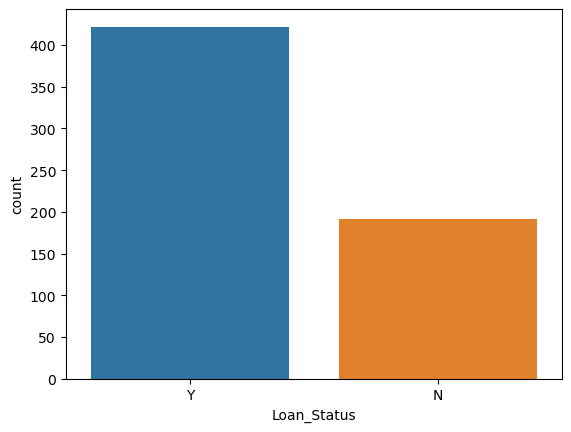

In [17]:
#No of people who take loan as group by loan status
print(df['Loan_Status'].value_counts())
sns.countplot(x='Loan_Status',data=df)

Credit_History
1.0    525
0.0     89
Name: count, dtype: int64


<Axes: xlabel='Credit_History', ylabel='count'>

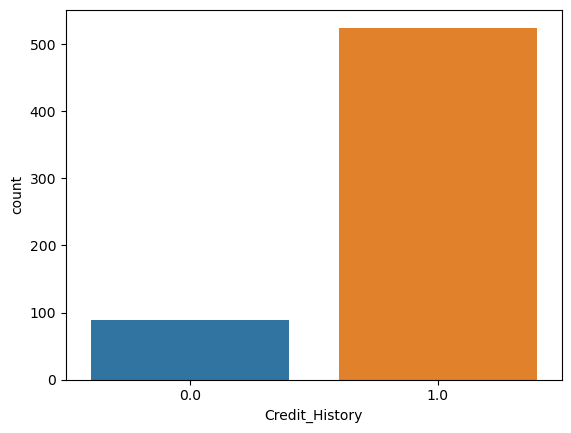

In [18]:
#No of people who take loan as group by Credit_History
print(df['Credit_History'].value_counts())
sns.countplot(x='Credit_History',data=df)

# checking outliers for columns

<Axes: >

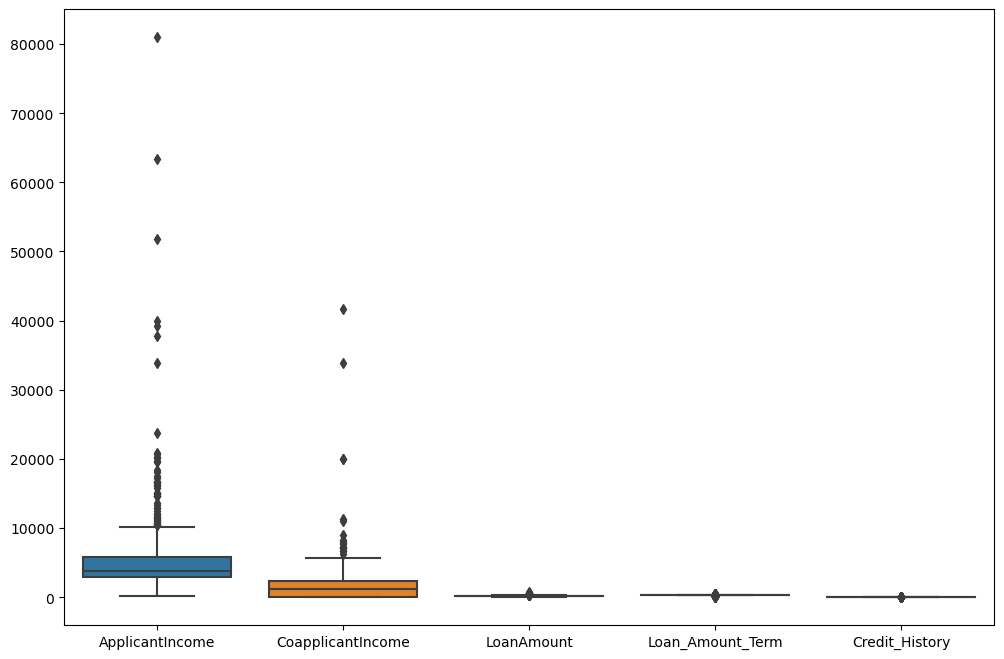

In [19]:
plt.figure(figsize=(12,8))
sns.boxplot(data = df)

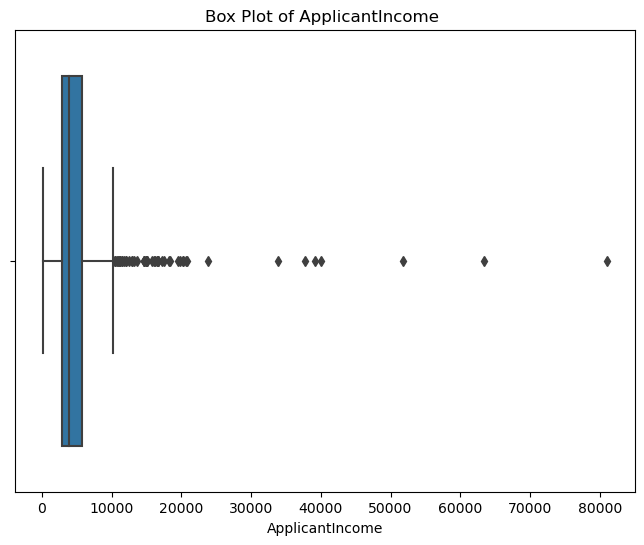

In [20]:
# Box plot before outlier removal
plt.figure(figsize=(8, 6))
sns.boxplot(x='ApplicantIncome', data=df)
plt.title('Box Plot of ApplicantIncome ')
plt.show()

# Remove outlier in upperange using IQR method

In [21]:
#Applicant column
Q1 = df['ApplicantIncome'].quantile(0.25)
Q3 = df['ApplicantIncome'].quantile(0.75)
IQR = Q3 - Q1

In [22]:
df = df[(df['ApplicantIncome'] >= (Q1 - 1.5 * IQR)) & (df['ApplicantIncome'] <= (Q3 + 1.5 * IQR))]

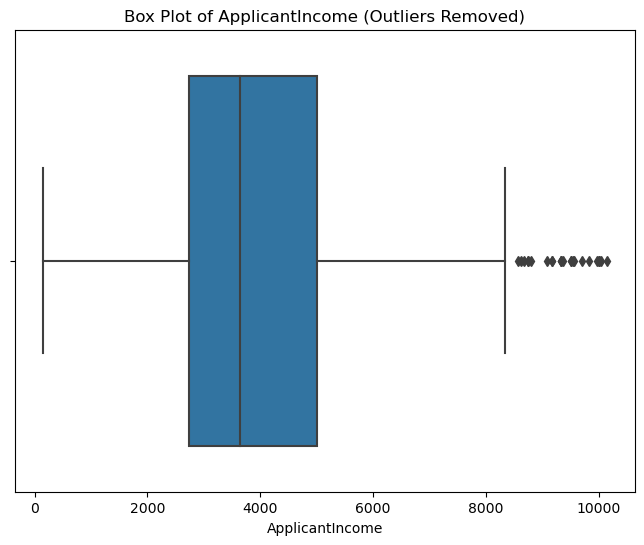

In [23]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='ApplicantIncome', data=df)
plt.title('Box Plot of ApplicantIncome (Outliers Removed)')
plt.show()

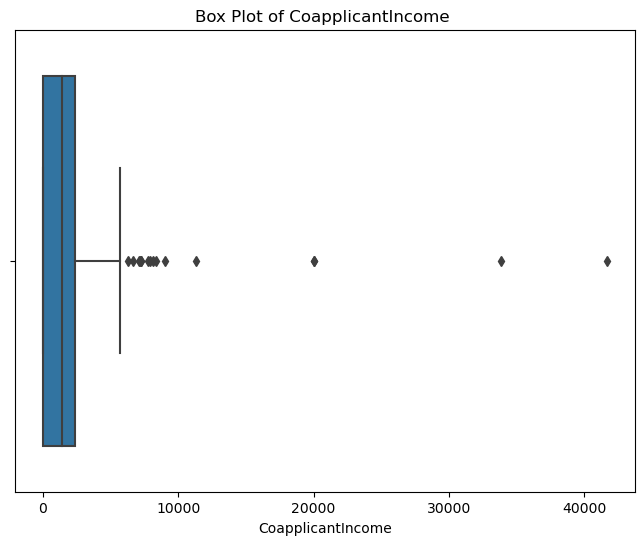

In [24]:
# Box plot before outlier removal
plt.figure(figsize=(8, 6))
sns.boxplot(x='CoapplicantIncome', data=df)
plt.title('Box Plot of CoapplicantIncome ')
plt.show()

In [25]:
#Coapplicant column
Q1 = df['CoapplicantIncome'].quantile(0.25)
Q3 = df['CoapplicantIncome'].quantile(0.75)
IQR = Q3 - Q1

In [26]:
df = df[(df['CoapplicantIncome'] >= (Q1 - 1.5 * IQR)) & (df['CoapplicantIncome'] <= (Q3 + 1.5 * IQR))]

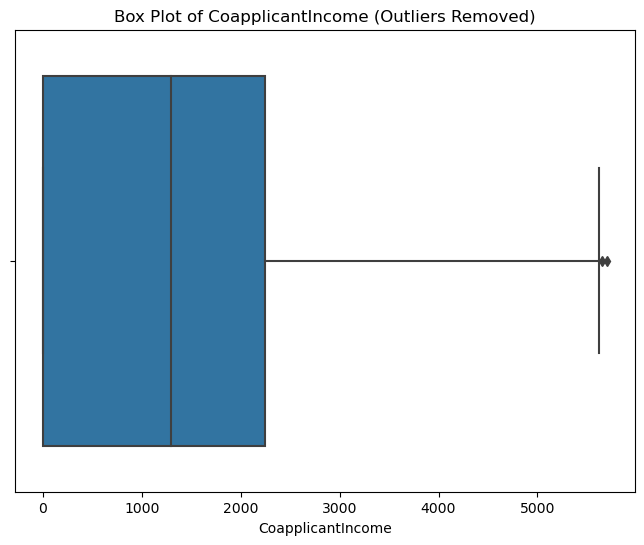

In [27]:
# Box plot after outlier removal
plt.figure(figsize=(8, 6))
sns.boxplot(x='CoapplicantIncome', data=df)
plt.title('Box Plot of CoapplicantIncome (Outliers Removed)')
plt.show()

# checking skewness for numeric column

In [28]:
#import 
from scipy.stats import skew

Column: ApplicantIncome
Skewness: 1.088169884321227
Column: CoapplicantIncome
Skewness: 0.8347513406123095
Column: LoanAmount
Skewness: 1.0526551440813519
Column: Loan_Amount_Term
Skewness: -2.4698898849775976
Column: Credit_History
Skewness: -2.031682967488577


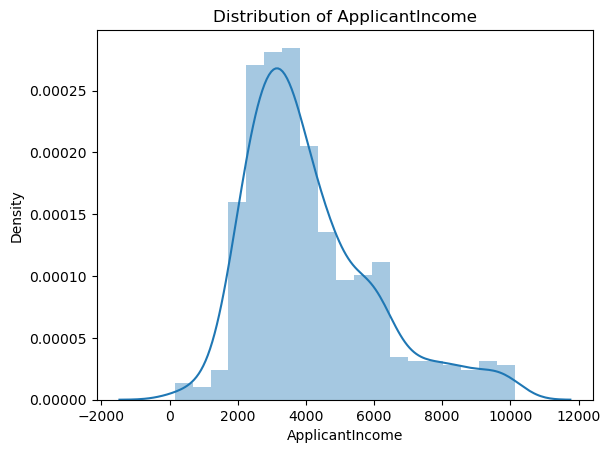

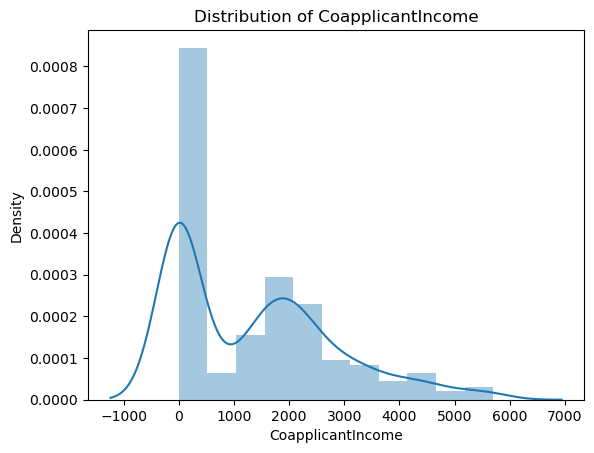

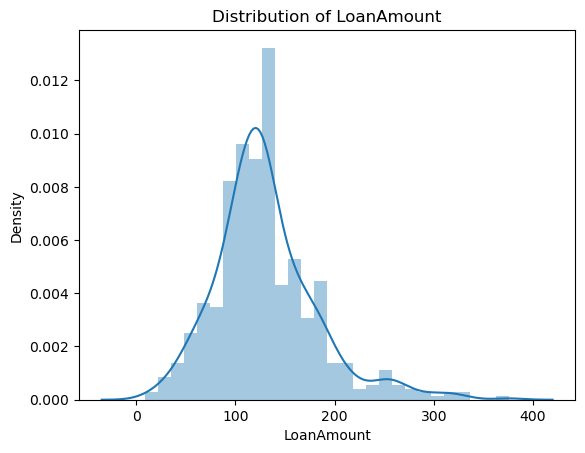

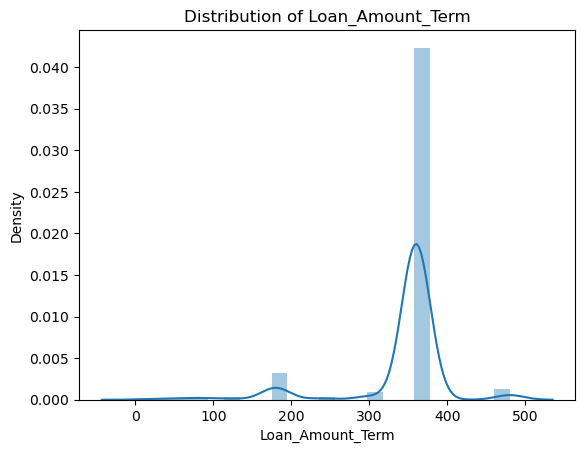

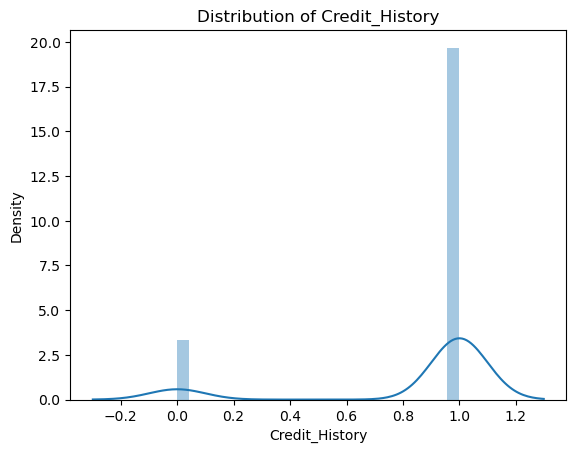

In [29]:
# Assuming df is your loan dataset
columns = columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term','Credit_History']

for col in columns:
    print(f"Column: {col}")
    print(f"Skewness: {df[col].skew()}")  # Calculate skewness
    plt.figure()
    sns.distplot(df[col])  # Create distribution plot
    plt.title(f"Distribution of {col}")
    plt.show

In [30]:
# total income
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0


# Log Transformation

<Axes: xlabel='Loan_Amount_Term_Log', ylabel='Density'>

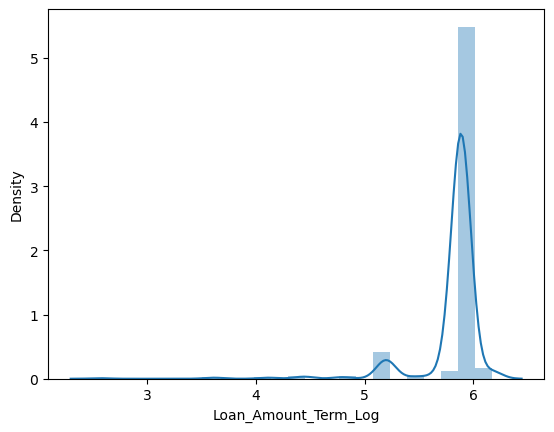

In [34]:
df['Loan_Amount_Term_Log'] = np.log(df['Loan_Amount_Term']+1)
sns.distplot(df["Loan_Amount_Term_Log"])

<Axes: xlabel='Total_Income_Log', ylabel='Density'>

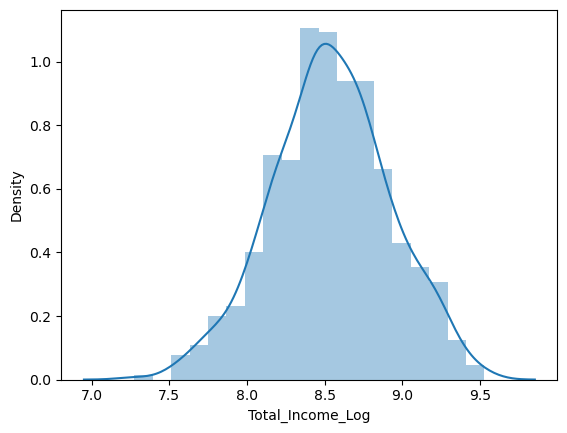

In [35]:
df['Total_Income_Log'] = np.log(df['Total_Income']+1)
sns.distplot(df["Total_Income_Log"])

# Label Encoding 

In [36]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df:
    df[col] = le.fit_transform(df[col])

In [37]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,0,1,0,0,0,0,367,0,79,8,1,2,1,320,367,0,79,8,320
1,1,1,1,1,0,0,298,58,79,8,1,0,0,333,298,58,79,8,333
2,2,1,1,0,0,1,132,0,26,8,1,2,1,42,132,0,26,8,42
3,3,1,1,0,1,0,85,157,71,8,1,2,1,238,85,157,71,8,238
4,4,1,0,0,0,0,372,0,92,8,1,2,1,327,372,0,92,8,327


# Select Feature and target column

In [38]:
X = df.drop(columns=['Loan_Status'], axis=1)
y = df['Loan_Status']

In [39]:
X

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,0,1,0,0,0,0,367,0,79,8,1,2,320,367,0,79,8,320
1,1,1,1,1,0,0,298,58,79,8,1,0,333,298,58,79,8,333
2,2,1,1,0,0,1,132,0,26,8,1,2,42,132,0,26,8,42
3,3,1,1,0,1,0,85,157,71,8,1,2,238,85,157,71,8,238
4,4,1,0,0,0,0,372,0,92,8,1,2,327,372,0,92,8,327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,543,0,0,0,0,0,118,0,29,8,1,0,31,118,0,29,8,31
610,544,1,1,3,0,0,267,0,7,5,1,0,135,267,0,7,5,135
611,545,1,1,1,0,0,421,3,155,8,1,2,436,421,3,155,8,436
612,546,1,1,2,0,0,413,0,129,8,1,2,416,413,0,129,8,416


In [40]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 548, dtype: int32

# train test split

In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(X,y,test_size=0.25,random_state=1)  

# Standard scaler

In [42]:
from sklearn.preprocessing import StandardScaler    
ss = StandardScaler()

In [43]:
#training and testing data
x_train = ss.fit_transform(x_train)
x_test = ss.fit_transform(x_test)

In [44]:
x_train

array([[-1.0235796 ,  0.44917078,  0.71875251, ...,  1.15929694,
         0.27275617,  1.34939283],
       [ 1.17912515,  0.44917078,  0.71875251, ...,  0.48566825,
         0.27275617,  0.14186463],
       [-0.02696679,  0.44917078,  0.71875251, ..., -0.43046676,
         0.27275617, -0.09532841],
       ...,
       [-1.26479799,  0.44917078,  0.71875251, ...,  1.15929694,
        -0.68538731,  1.07626145],
       [-0.23009806,  0.44917078, -1.3912995 , ..., -0.02628955,
         0.27275617,  0.02686194],
       [-1.48697282,  0.44917078, -1.3912995 , ..., -1.83161443,
         0.27275617, -1.48973598]])

In [45]:
x_test

array([[ 1.26740951,  0.55205245,  0.78215389, ...,  0.15270408,
         0.33793069, -0.12120588],
       [ 1.63623408,  0.55205245,  0.78215389, ..., -0.35079675,
         0.33793069,  0.14160037],
       [ 1.49245501, -1.81142209,  0.78215389, ..., -1.68507396,
         0.33793069, -1.2692542 ],
       ...,
       [-0.95178914, -1.81142209,  0.78215389, ..., -0.55219708,
         0.33793069,  1.02684245],
       [ 0.86732863,  0.55205245,  0.78215389, ..., -1.13122304,
        -1.93894659, -0.32176854],
       [ 0.16093582, -1.81142209, -1.27852078, ..., -1.55919875,
         0.33793069, -1.5389764 ]])

# Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [47]:
#training model
lr.fit(x_train,y_train)

LogisticRegression()

In [48]:
#testing
y_pred=lr.predict(x_test)

In [49]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.42      0.57        38
           1       0.82      0.98      0.89        99

    accuracy                           0.82       137
   macro avg       0.85      0.70      0.73       137
weighted avg       0.84      0.82      0.80       137



# Decision Tree Classifier

In [50]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [51]:
#training model
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [52]:
#testing
y_pred=dt.predict(x_test)

In [53]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.51      0.53      0.52        38
           1       0.82      0.81      0.81        99

    accuracy                           0.73       137
   macro avg       0.66      0.67      0.67       137
weighted avg       0.73      0.73      0.73       137



# Random Forest Classifier

In [54]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [55]:
#training model
rf.fit(x_train,y_train)

RandomForestClassifier()

In [56]:
#testing
y_pred=rf.predict(x_test)

In [57]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.45      0.58        38
           1       0.82      0.96      0.88        99

    accuracy                           0.82       137
   macro avg       0.81      0.70      0.73       137
weighted avg       0.82      0.82      0.80       137

